In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyneb as pn
from CALIFA_data import get_data, clean_data_incl

In [2]:
def read_CALIFA_data():
  data = get_data()
  data = clean_data_incl(data, 70)

  return data

In [3]:
CALIFA_data = read_CALIFA_data()
mask_OIII4363 = CALIFA_data.loc[:,'fluxOIII4363'] > 0
OIII4363_snr = CALIFA_data.loc[:,'fluxOIII4363']/CALIFA_data.loc[:,'e_fluxOIII4363']
mask_OIII4363_snr = OIII4363_snr > 3
mask_OIII5006 = CALIFA_data.loc[:,'fluxOIII5006'] > 0
mask_OIII5006_snr = CALIFA_data.loc[:,'fluxOIII5006'] / CALIFA_data.loc[:,'e_fluxOIII5006'] > 3
mask_OII3727 = CALIFA_data.loc[:,'fluxOII3727'] > 0
mask_OII3727_snr = CALIFA_data.loc[:,'fluxOII3727'] / CALIFA_data.loc[:,'e_fluxOII3727'] > 3
mask_SII6730 = CALIFA_data.loc[:,'fluxSII6730'] > 0
mask_SII6730_snr = CALIFA_data.loc[:,'fluxSII6730'] / CALIFA_data.loc[:,'e_fluxSII6730'] > 3
mask_SII6716 = CALIFA_data.loc[:,'fluxSII6716'] > 0
mask_SII6716_snr = CALIFA_data.loc[:,'fluxSII6716'] / CALIFA_data.loc[:,'e_fluxSII6716'] > 3
mask_SII = mask_SII6730 & mask_SII6730_snr & mask_SII6716 & mask_SII6716_snr 
mask_OIII = mask_OIII4363 & mask_OIII4363_snr & mask_OIII5006 & mask_OIII5006_snr 
mask_OII = mask_OII3727 & mask_OII3727_snr
CALIFA_data = CALIFA_data[mask_OII & mask_OIII & mask_SII]

/home/espinosa/GoogleDrive/cespinosa/Code/ANN_for_ISM/CALIFA_data.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sfh_all = dataframe_sfh_extended.append(df_sfh_pilot, sort=False)
/home/espinosa/GoogleDrive/cespinosa/Code/ANN_for_ISM/CALIFA_data.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ssp_all = dataframe_ssp_e.append(dataframe_ssp_p, sort=False)


5634 212


In [7]:
if not os.path.exists('data_CALIFA.csv'):
  print('Creating data file')
  elines_list = ['fluxHb4861', 'fluxHa6562', 'fluxOIII4363', 'fluxOIII5006',
                'fluxSII6716', 'fluxSII6730', 'fluxOII3727',
                'e_fluxHb4861', 'e_fluxHa6562', 'e_fluxOIII4363',
                'e_fluxOIII5006', 'e_fluxSII6716', 'e_fluxSII6730', 'e_fluxOII3727']
  data = CALIFA_data.loc[:, elines_list]
  data.rename(columns={'fluxOIII4363':'O3_4363A', 'fluxOIII5006':'O3_5007A',
                        'fluxSII6716':'S2_6716A', 'fluxSII6730':'S2_6731A',
                        'fluxHb4861':'H1r_4861A', 'fluxHa6562':'H1r_6563A', 
                        'fluxOII3727':'O2_3726A',
                        'e_fluxOIII4363':'O3_4363Ae',
                        'e_fluxOIII5006':'O3_5007Ae',
                        'e_fluxOII3727':'O2_3726Ae',
                        'e_fluxSII6716':'S2_6716Ae',
                        'e_fluxSII6730':'S2_6731Ae',
                        'e_fluxHb4861':'H1r_4861Ae',
                        'e_fluxHa6562':'H1r_6563Ae'}, inplace=True)

  data.index.rename('NAME', inplace=True)
  data.to_csv('data_CALIFA.csv')
else:
  data = pd.read_csv('data_CALIFA.csv', index_col=0)

Creating data file


In [8]:
data

,H1r_4861A,H1r_6563A,O3_4363A,O3_5007A,S2_6716A,S2_6731A,O2_3726A,H1r_4861Ae,H1r_6563Ae,O3_4363Ae,O3_5007Ae,S2_6716Ae,S2_6731Ae,O2_3726Ae
NAME,,,,,,,,,,,,,,
2MASSXJ22532475-2,19.875686,85.125077,2.027846,12.840601,36.408136,25.883470,34.785619,0.464020,0.328404,0.638019,0.473344,0.451172,0.419988,0.934931
2MASSXJ22532475-4,12.216219,42.821858,1.173962,4.427141,11.614654,8.101311,16.754788,0.199656,0.188794,0.383977,0.192737,0.215081,0.220838,0.699166
2MASXJ15024995+4847010-2,10.092876,29.860216,1.895050,5.072955,11.667929,9.602557,14.961350,0.279788,0.337503,0.474587,0.238937,0.261591,0.263614,1.096752
2MASXJ15024995+4847010-3,5.830622,19.285011,1.991361,3.667064,6.830540,6.258567,6.833448,0.260087,0.160699,0.495121,0.236436,0.217470,0.233239,1.138764
2MASXJ15024995+4847010-4,4.408883,16.328987,1.130116,2.860513,4.785489,4.992121,5.622339,0.212717,0.135570,0.319291,0.190816,0.184307,0.187429,1.142862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ngc3184-43,252.369051,981.468816,223.035733,66.423504,156.287804,240.236605,193.242307,8.001729,7.918357,8.120815,7.271031,6.924079,8.586667,16.058675
ngc3184-45,201.757900,860.479711,26.066424,53.784557,125.360884,185.340341,293.337891,7.179736,8.301836,8.021741,6.993673,6.415902,7.300388,10.667965
ngc3184-48,213.915809,879.223439,159.234727,36.020310,131.144363,142.467595,150.958068,7.997459,8.992305,8.304729,8.145799,8.228262,8.366153,13.868203


In [9]:
obs = pn.Observation('data_CALIFA.csv', fileFormat='lines_in_cols', delimiter=',')

In [10]:
obs.extinction.law = 'CCM89'
obs.correctData()

In [11]:
diags = pn.Diagnostics()
diags.addDiagsFromObs(obs)
diags.diags

{'[OIII] 4363/5007': ('O3', 'L(4363)/L(5007)', 'RMS([E(5007), E(4363)])'),
 '[SII] 6731/6716': ('S2', 'L(6731)/L(6716)', 'RMS([E(6716), E(6731)])')}

In [12]:
temps, dens = diags.getCrossTemDen('[OIII] 4363/5007', '[SII] 6731/6716', obs=obs)

Text(0.5, 0, 'Temperature')

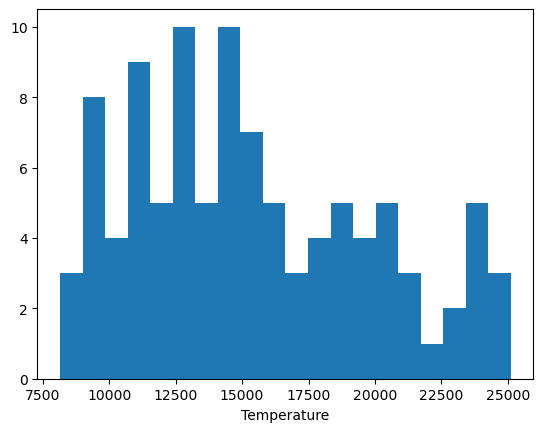

In [13]:
fig, ax = plt.subplots()
ax.hist(temps, bins=20)
ax.set_xlabel('Temperature')

Text(0.5, 0, '$\\log(n_e)$')

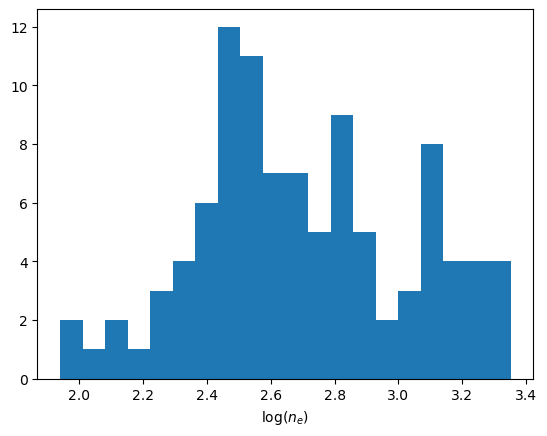

In [14]:
fig, ax = plt.subplots()
ax.hist(np.log10(dens), bins=20)
ax.set_xlabel(r'$\log(n_e)$')

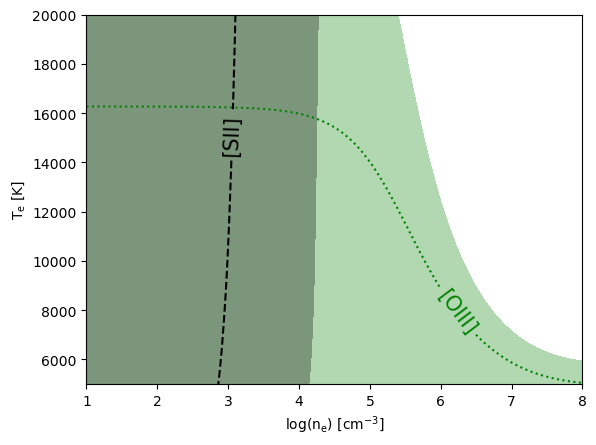

In [13]:
emisgrids = pn.getEmisGridDict(atomDict=diags.atomDict)
diags.plot(emisgrids, obs, i_obs=610)

In [15]:
# Define a dictionary to hold all the Atom objects needed
all_atoms = pn.getAtomDict(atom_list=obs.getUniqueAtoms())
# define a dictionary to store the abundances
ab_dict = {}
# we  use the following lines to determine the ionic abundances
ab_labels = ['O2_3726A', 'O3_4363A', 'O3_5007A', 'S2_6716A', 
             'S3_6312A',]
for line in obs.getSortedLines():
    if line.label in ab_labels:
        ab = all_atoms[line.atom].getIonAbundance(line.corrIntens, temps, dens, 
                                                  to_eval=line.to_eval)
        ab_dict[line.atom] = ab

warng _ManageAtomicData: atom data not available for H1
warng _ManageAtomicData: coll data not available for H1
warng _ManageAtomicData: rec data not available for S2


In [16]:
ab_dict

{'O2': array([           nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan, 4.95258704e-05, 1.73743703e-04, 1.15162079e-04,
                   nan,            nan,            nan, 4.54532886e-05,
        1.14325590e-05, 1.28290133e-05, 5.14172772e-06,            nan,
                   nan,            nan,            nan, 2.62309874e-04,
        2.17161113e-03,            nan,            nan,            nan,
                   nan,            nan,            nan, 8.13355323e-04,
                   nan,            nan,            nan, 6.08475820e-06,
        1.86088265e-05,            nan, 8.43182439e-04, 7.88451683e-04,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
        1.73592370e-04, 7.42977317e-05,            nan,   

In [17]:
mask_O3 = ~np.isnan(ab_dict['O3'])
mask_O2 = ~np.isnan(ab_dict['O2'])
mask = mask_O2 & mask_O3

Text(0.5, 0, 'SNR(O3$\\lambda 4363$)')

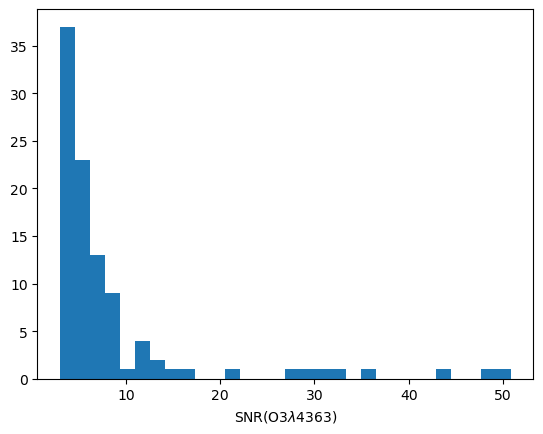

In [31]:
_ = plt.hist(OIII4363_snr[mask_OIII & mask_SII & mask_OII][mask], bins=30)
plt.xlabel(r'SNR(O3$\lambda 4363$)')

In [23]:
O3_ab = ab_dict['O3'][mask]
O2_ab = ab_dict['O2'][mask]
OH = O3_ab + O2_ab

In [22]:
O3_ab


array([1.08276687e-05, 7.37930721e-05, 3.79931899e-05, 2.02005559e-05,
       4.01025597e-06, 5.74839948e-06, 1.81255726e-06, 3.30782052e-04,
       5.55413305e-04, 1.01501281e-03, 1.27330865e-06, 1.06379681e-05,
       2.07805996e-04, 2.27533026e-04, 2.02122162e-04, 2.70546701e-05,
       1.26860022e-05, 1.77876364e-05, 1.14723729e-05, 1.47638953e-05,
       3.30255189e-06, 1.14852700e-04, 1.80025373e-05, 6.10399052e-04,
       5.30616533e-05, 2.40672607e-04, 5.63340707e-06, 5.08214847e-05,
       2.93774057e-05, 2.13932057e-05, 1.13834786e-06, 4.12668061e-06,
       2.72971113e-06, 1.90343217e-06, 7.48740721e-06, 2.35410806e-06,
       1.10538777e-05, 1.50734104e-06, 5.82574066e-07, 1.14742142e-05,
       1.72321433e-04, 5.80387082e-06, 2.50308423e-05, 1.17365988e-06,
       1.38419291e-05, 2.60348660e-04, 1.65530386e-06, 1.70068400e-04,
       2.65720546e-06, 2.80332726e-04, 6.79601357e-05, 7.50460055e-05,
       5.79992234e-05, 1.23943796e-04, 2.52062526e-05, 6.11306668e-04,
      

In [25]:
OH = 12 + np.log10(OH)

Text(0.5, 0, '12 + log(O/H)')

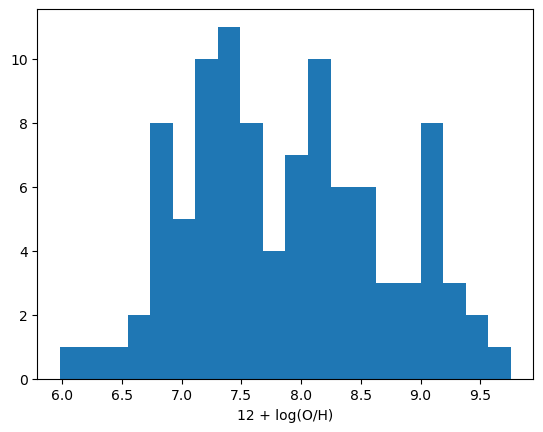

In [32]:
fig, ax = plt.subplots()
ax.hist(OH, bins=20)
ax.set_xlabel('12 + log(O/H)')

Text(0, 0.5, '$12 + \\log(\\mathrm{O}/\\mathrm{H})_{O3N2}$')

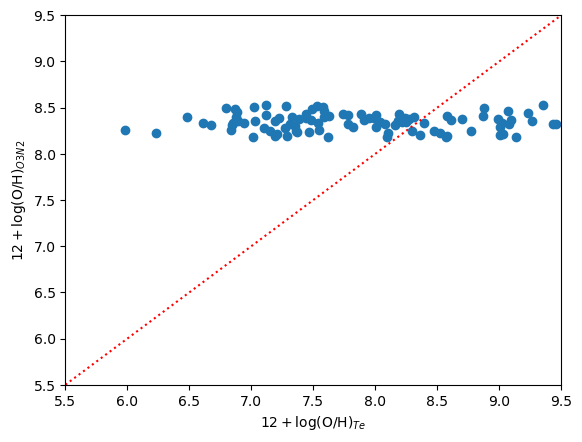

In [36]:
fig, ax = plt.subplots()
ax.plot((5.5,9.5),(5.5,9.5), 'r:')
ax.scatter(OH, CALIFA_data['OH_M13_O3N2'][mask])
ax.set_xlim(5.5,9.5)
ax.set_ylim(5.5,9.5)
ax.set_xlabel(r'$12 + \log(\mathrm{O}/\mathrm{H})_{Te}$')
ax.set_ylabel(r'$12 + \log(\mathrm{O}/\mathrm{H})_{O3N2}$')

Text(0, 0.5, '$12 + \\log(\\mathrm{O}/\\mathrm{H})_{NB}$')

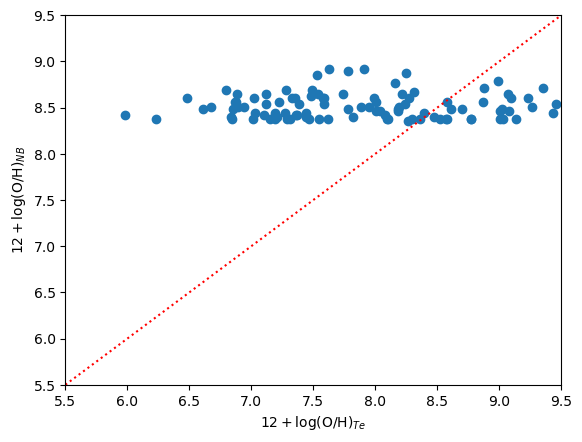

In [37]:
fig, ax = plt.subplots()
ax.plot((5.5,9.5),(5.5,9.5), 'r:')
ax.scatter(OH, CALIFA_data['OH_NB'][mask])
ax.set_xlim(5.5,9.5)
ax.set_ylim(5.5,9.5)
ax.set_xlabel(r'$12 + \log(\mathrm{O}/\mathrm{H})_{Te}$')
ax.set_ylabel(r'$12 + \log(\mathrm{O}/\mathrm{H})_{NB}$')

Text(0, 0.5, '$12 + \\log(\\mathrm{O}/\\mathrm{H})_{Ho}$')

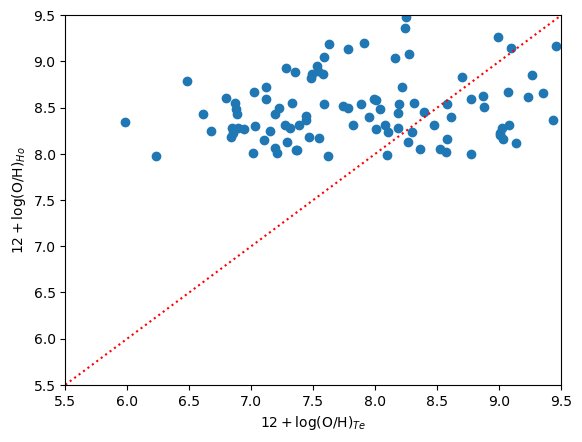

In [38]:
fig, ax = plt.subplots()
ax.plot((5.5,9.5),(5.5,9.5), 'r:')
ax.scatter(OH, CALIFA_data['OH_Ho'][mask])
ax.set_xlim(5.5,9.5)
ax.set_ylim(5.5,9.5)
ax.set_xlabel(r'$12 + \log(\mathrm{O}/\mathrm{H})_{Te}$')
ax.set_ylabel(r'$12 + \log(\mathrm{O}/\mathrm{H})_{Ho}$')

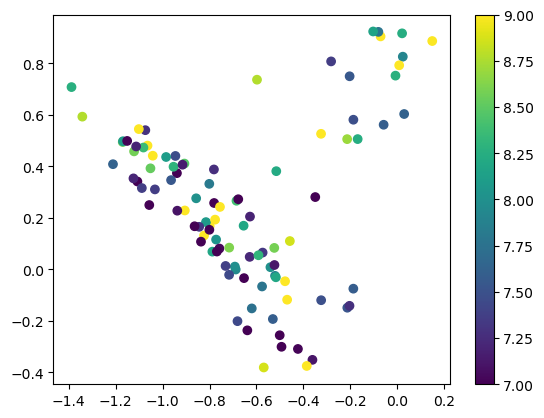

In [48]:
x = np.log10(CALIFA_data['N2Ha_dd'][mask])
y = np.log10(CALIFA_data['O3Hb_dd'][mask])
fig, ax = plt.subplots()
plot = ax.scatter(x,y,c=OH, vmin=7, vmax=9)
cbar = fig.colorbar(plot)